<a href="https://colab.research.google.com/github/ShubhamX12/demo/blob/main/catclasssfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir  -p ~/.kaggle
!cp  /content/sample_data/kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 21.1MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall('/content')
zip_ref.close();

In [17]:
 import tensorflow as tf
 from tensorflow import keras
 from keras import Sequential
 from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


GENRERATOR To help large amount data ItS 

In [5]:
trainds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize the data between 0 to 1
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
trainds=trainds.map(process);
validds=validds.map(process);

In [20]:
#cnn model creation:
#create cnn model

model=Sequential();
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization());
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization());
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization());
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))    #requried

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(trainds,epochs=10,validation_data=validds)

Epoch 1/10
625/625 [==============================] - 73s 115ms/step - loss: 0.6574 - accuracy: 0.6054 - val_loss: 0.6928 - val_accuracy: 0.5300
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.6550 - accuracy: 0.6051 - val_loss: 0.6650 - val_accuracy: 0.5950
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.6358 - accuracy: 0.6310 - val_loss: 0.6435 - val_accuracy: 0.6264
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6227 - accuracy: 0.6477 - val_loss: 0.6529 - val_accuracy: 0.5922
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6178 - accuracy: 0.6486 - val_loss: 0.6462 - val_accuracy: 0.6274
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6028 - accuracy: 0.6680 - val_loss: 0.6880 - val_accuracy: 0.6130
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5932 - accuracy: 0.6763 - val_loss: 0.6391 - val_ac

In [24]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Before the Overfiting Normalization added

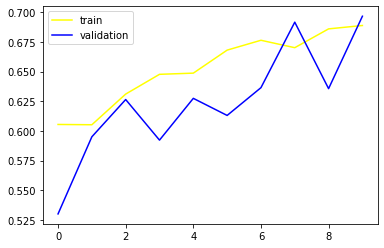

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='yellow',label='train')

plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show();

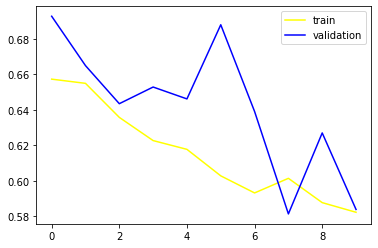

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='yellow',label='train')

plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show();

After Normalization added

In [ ]:
#ways to reduce overfiting

#add more data
#data Arugnmentaton
#L1/L2 Regulatizer
#Batch Normation
#Droput
#reduce complexity

In [27]:
import cv2

In [58]:
testimg=cv2.imread("/content/train/cats/cat.10089.jpg")
dog=cv2.imread("/content/train/dogs/dog.10863.jpg")


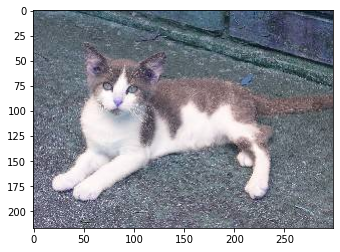

In [60]:
plt.imshow(testimg) 

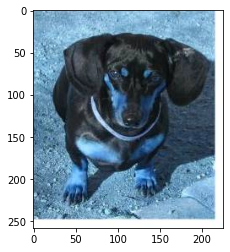

In [59]:

plt.imshow(dog)

In [35]:
dog.shape

(3888, 5184, 3)

In [65]:
testimg=cv2.resize(testimg,(256,256))
test_input=testimg.reshape((1,256,256,3))

In [63]:
dog=cv2.resize(dog,(256,256))
test_input=dog.reshape((1,256,256,3))

In [66]:
model.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[0.32697293]], dtype=float32)